In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [57]:
data = pd.read_excel('sales.xlsx')

In [58]:
data

,CustID,AgentBonus,Age,CustTenure,Channel,Occupation,EducationField,Gender,ExistingProdType,Designation,NumberOfPolicy,MaritalStatus,MonthlyIncome,Complaint,ExistingPolicyTenure,SumAssured,Zone,PaymentMethod,LastMonthCalls,CustCareScore
0,7000000,4409,22.0,4.0,Agent,Salaried,Graduate,Female,3,Manager,2.0,Single,20993.0,1,2.0,806761.0,North,Half Yearly,5,2.0
1,7000001,2214,11.0,2.0,Third Party Partner,Salaried,Graduate,Male,4,Manager,4.0,Divorced,20130.0,0,3.0,294502.0,North,Yearly,7,3.0
2,7000002,4273,26.0,4.0,Agent,Free Lancer,Post Graduate,Male,4,Exe,3.0,Unmarried,17090.0,1,2.0,NaN,North,Yearly,0,3.0
3,7000003,1791,11.0,NaN,Third Party Partner,Salaried,Graduate,Fe male,3,Executive,3.0,Divorced,17909.0,1,2.0,268635.0,West,Half Yearly,0,5.0
4,7000004,2955,6.0,NaN,Agent,Small Business,UG,Male,3,Executive,4.0,Divorced,18468.0,0,4.0,366405.0,West,Half Yearly,2,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4515,7004515,3953,4.0,8.0,Agent,Small Business,Graduate,Male,4,Senior Manager,2.0,Single,26355.0,0,2.0,636473.0,West,Yearly,9,1.0
4516,7004516,2939,9.0,9.0,Agent,Salaried,Under Graduate,Female,2,Executive,2.0,Married,20991.0,0,3.0,296813.0,North,Yearly,1,3.0
4517,7004517,3792,23.0,23.0,Agent,Salaried,Engineer,Female,5,AVP,5.0,Single,NaN,0,2.0,667371.0,North,Half Yearly,4,1.0
4518,7004518,4816,10.0,10.0,Online,Small Business,Graduate,Female,4,Executive,2.0,Single,20068.0,0,6.0,943999.0,West,Half Yearly,1,5.0


In [60]:
## numerical features
numerical_feature = [feature for feature in data.columns if data[feature].dtype != 'O']
numerical_feature

['CustID',
 'AgentBonus',
 'Age',
 'CustTenure',
 'ExistingProdType',
 'NumberOfPolicy',
 'MonthlyIncome',
 'Complaint',
 'ExistingPolicyTenure',
 'SumAssured',
 'LastMonthCalls',
 'CustCareScore']

In [61]:
##continuous and discrete features
discrete_feature = [feature for feature in numerical_feature if len(data[feature].unique()) < 25]
continuous_feature = [feature for feature in numerical_feature if feature not in discrete_feature+['CustID']]

In [62]:
continuous_feature

['AgentBonus',
 'Age',
 'CustTenure',
 'MonthlyIncome',
 'ExistingPolicyTenure',
 'SumAssured']

In [63]:
discrete_feature

['ExistingProdType',
 'NumberOfPolicy',
 'Complaint',
 'LastMonthCalls',
 'CustCareScore']

In [64]:
## categorical feature
categorical_feature = [feature for feature in data.columns if data[feature].dtype == 'O']
categorical_feature

['Channel',
 'Occupation',
 'EducationField',
 'Gender',
 'Designation',
 'MaritalStatus',
 'Zone',
 'PaymentMethod']

In [65]:
cat = []
for category in categorical_feature:
        cat.append(data[category].unique())
cat

[array(['Agent', 'Third Party Partner', 'Online'], dtype=object),
 array(['Salaried', 'Free Lancer', 'Small Business', 'Laarge Business',
        'Large Business'], dtype=object),
 array(['Graduate', 'Post Graduate', 'UG', 'Under Graduate', 'Engineer',
        'Diploma', 'MBA'], dtype=object),
 array(['Female', 'Male', 'Fe male'], dtype=object),
 array(['Manager', 'Exe', 'Executive', 'VP', 'AVP', 'Senior Manager'],
       dtype=object),
 array(['Single', 'Divorced', 'Unmarried', 'Married'], dtype=object),
 array(['North', 'West', 'East', 'South'], dtype=object),
 array(['Half Yearly', 'Yearly', 'Quarterly', 'Monthly'], dtype=object)]

In [66]:
data['Occupation'] = data['Occupation'].replace(to_replace='Laarge Business', value='Large Business')
data['Occupation'] = data['Occupation'].replace(to_replace='Free Lancer', value='Freelancer')
data['EducationField'] = data['EducationField'].replace(to_replace='UG', value='Under Graduate')
data['Gender'] = data['Gender'].replace(to_replace='Fe male', value='Female')
data['Designation'] = data['Designation'].replace(to_replace='Exe', value='Executive')
data['Designation'] = data['Designation'].replace(to_replace='Senior Manager', value='Senior_Manager')

## Univariate analysis

### Continuous features

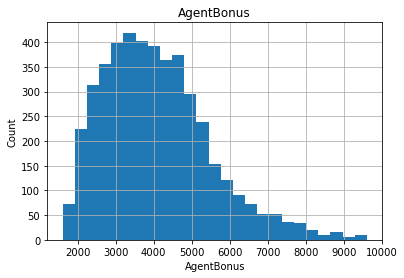

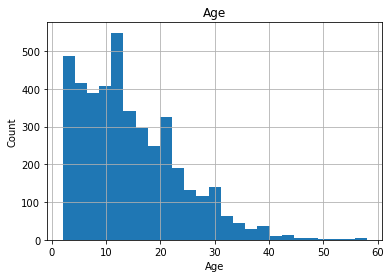

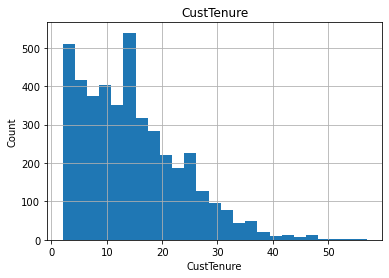

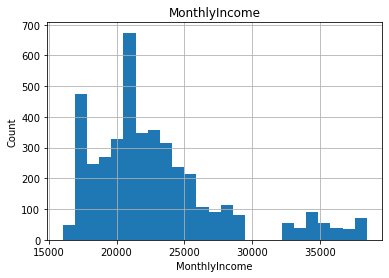

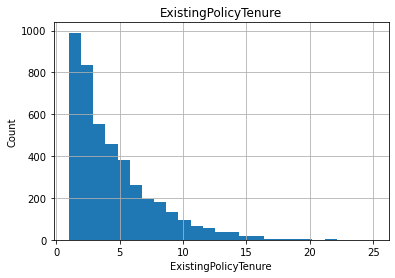

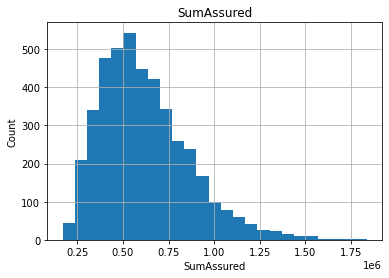

In [27]:
## Lets analyse the continuous values by creating histograms to understand the distribution

for feature in continuous_feature:
    dataset=data.copy()
    dataset[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

### Discrete features

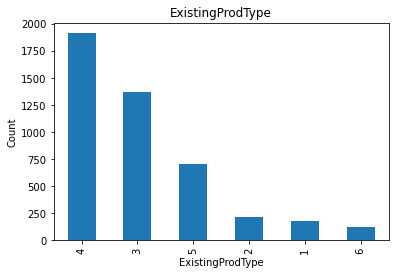

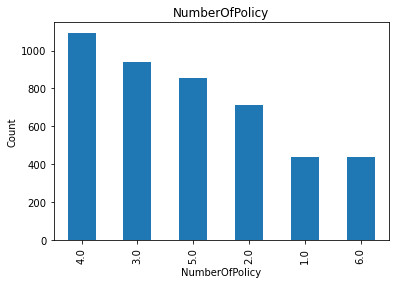

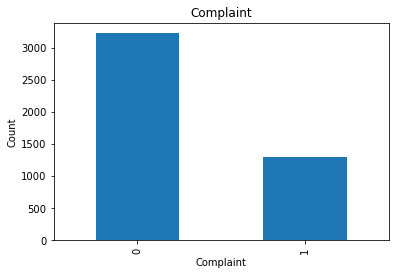

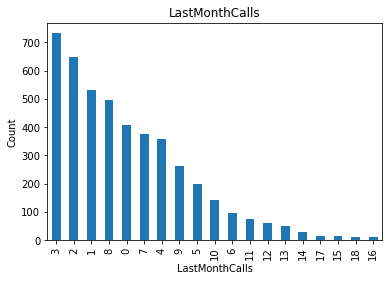

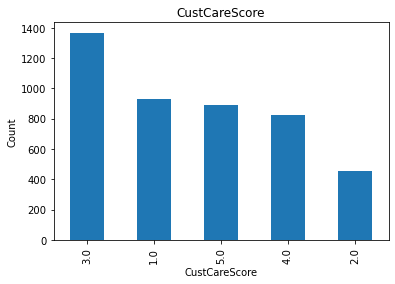

In [28]:
## Lets analyse the discrete values by creating histograms to understand the distribution

for feature in discrete_feature:
    dataset=data.copy()
    dataset[feature].value_counts().plot.bar()
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

### Categorical features

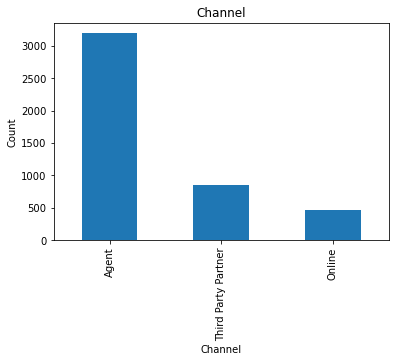

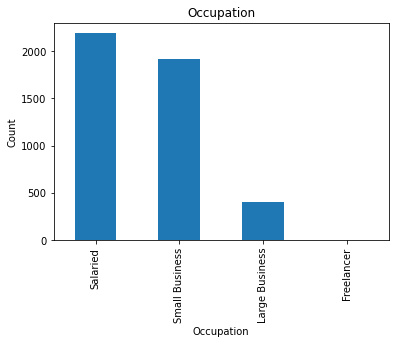

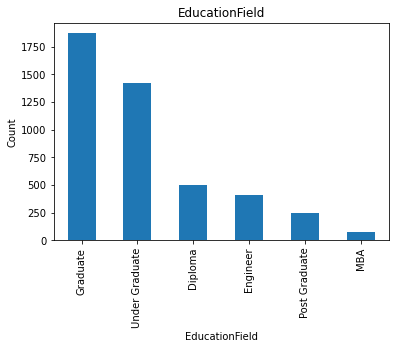

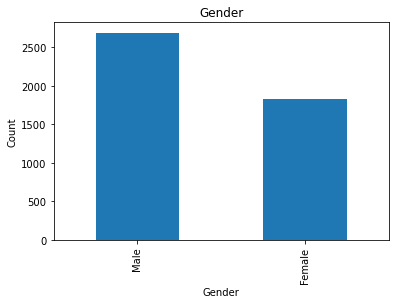

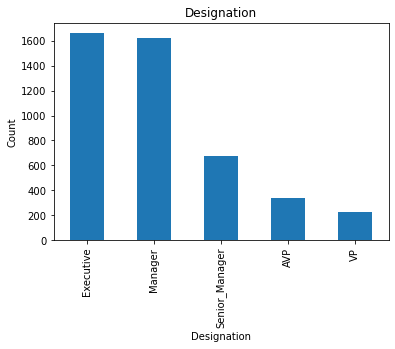

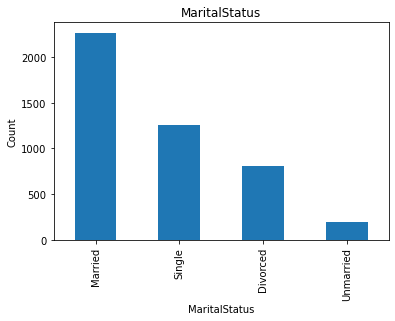

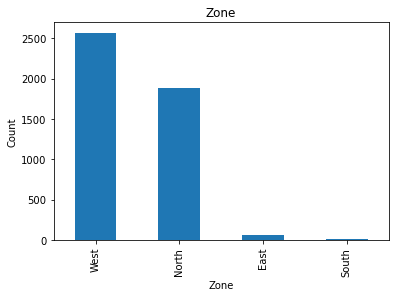

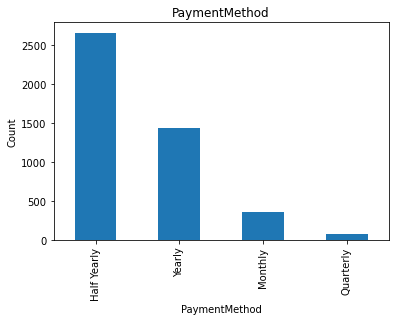

In [29]:
## Lets analyse the categorical values by creating histograms to understand the distribution

for feature in categorical_feature:
    dataset=data.copy()
    dataset[feature].value_counts().plot.bar()
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

## Bivariate Analysis

In [32]:
## 1. Agent bonus and sumassured

In [33]:
import seaborn as sns

<AxesSubplot:xlabel='SumAssured', ylabel='AgentBonus'>

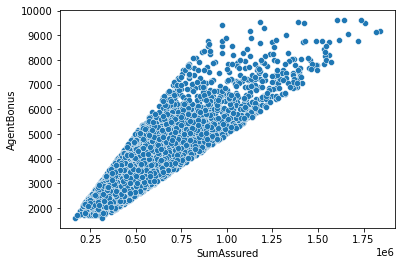

In [34]:
sns.scatterplot(data=data, x="SumAssured", y="AgentBonus")

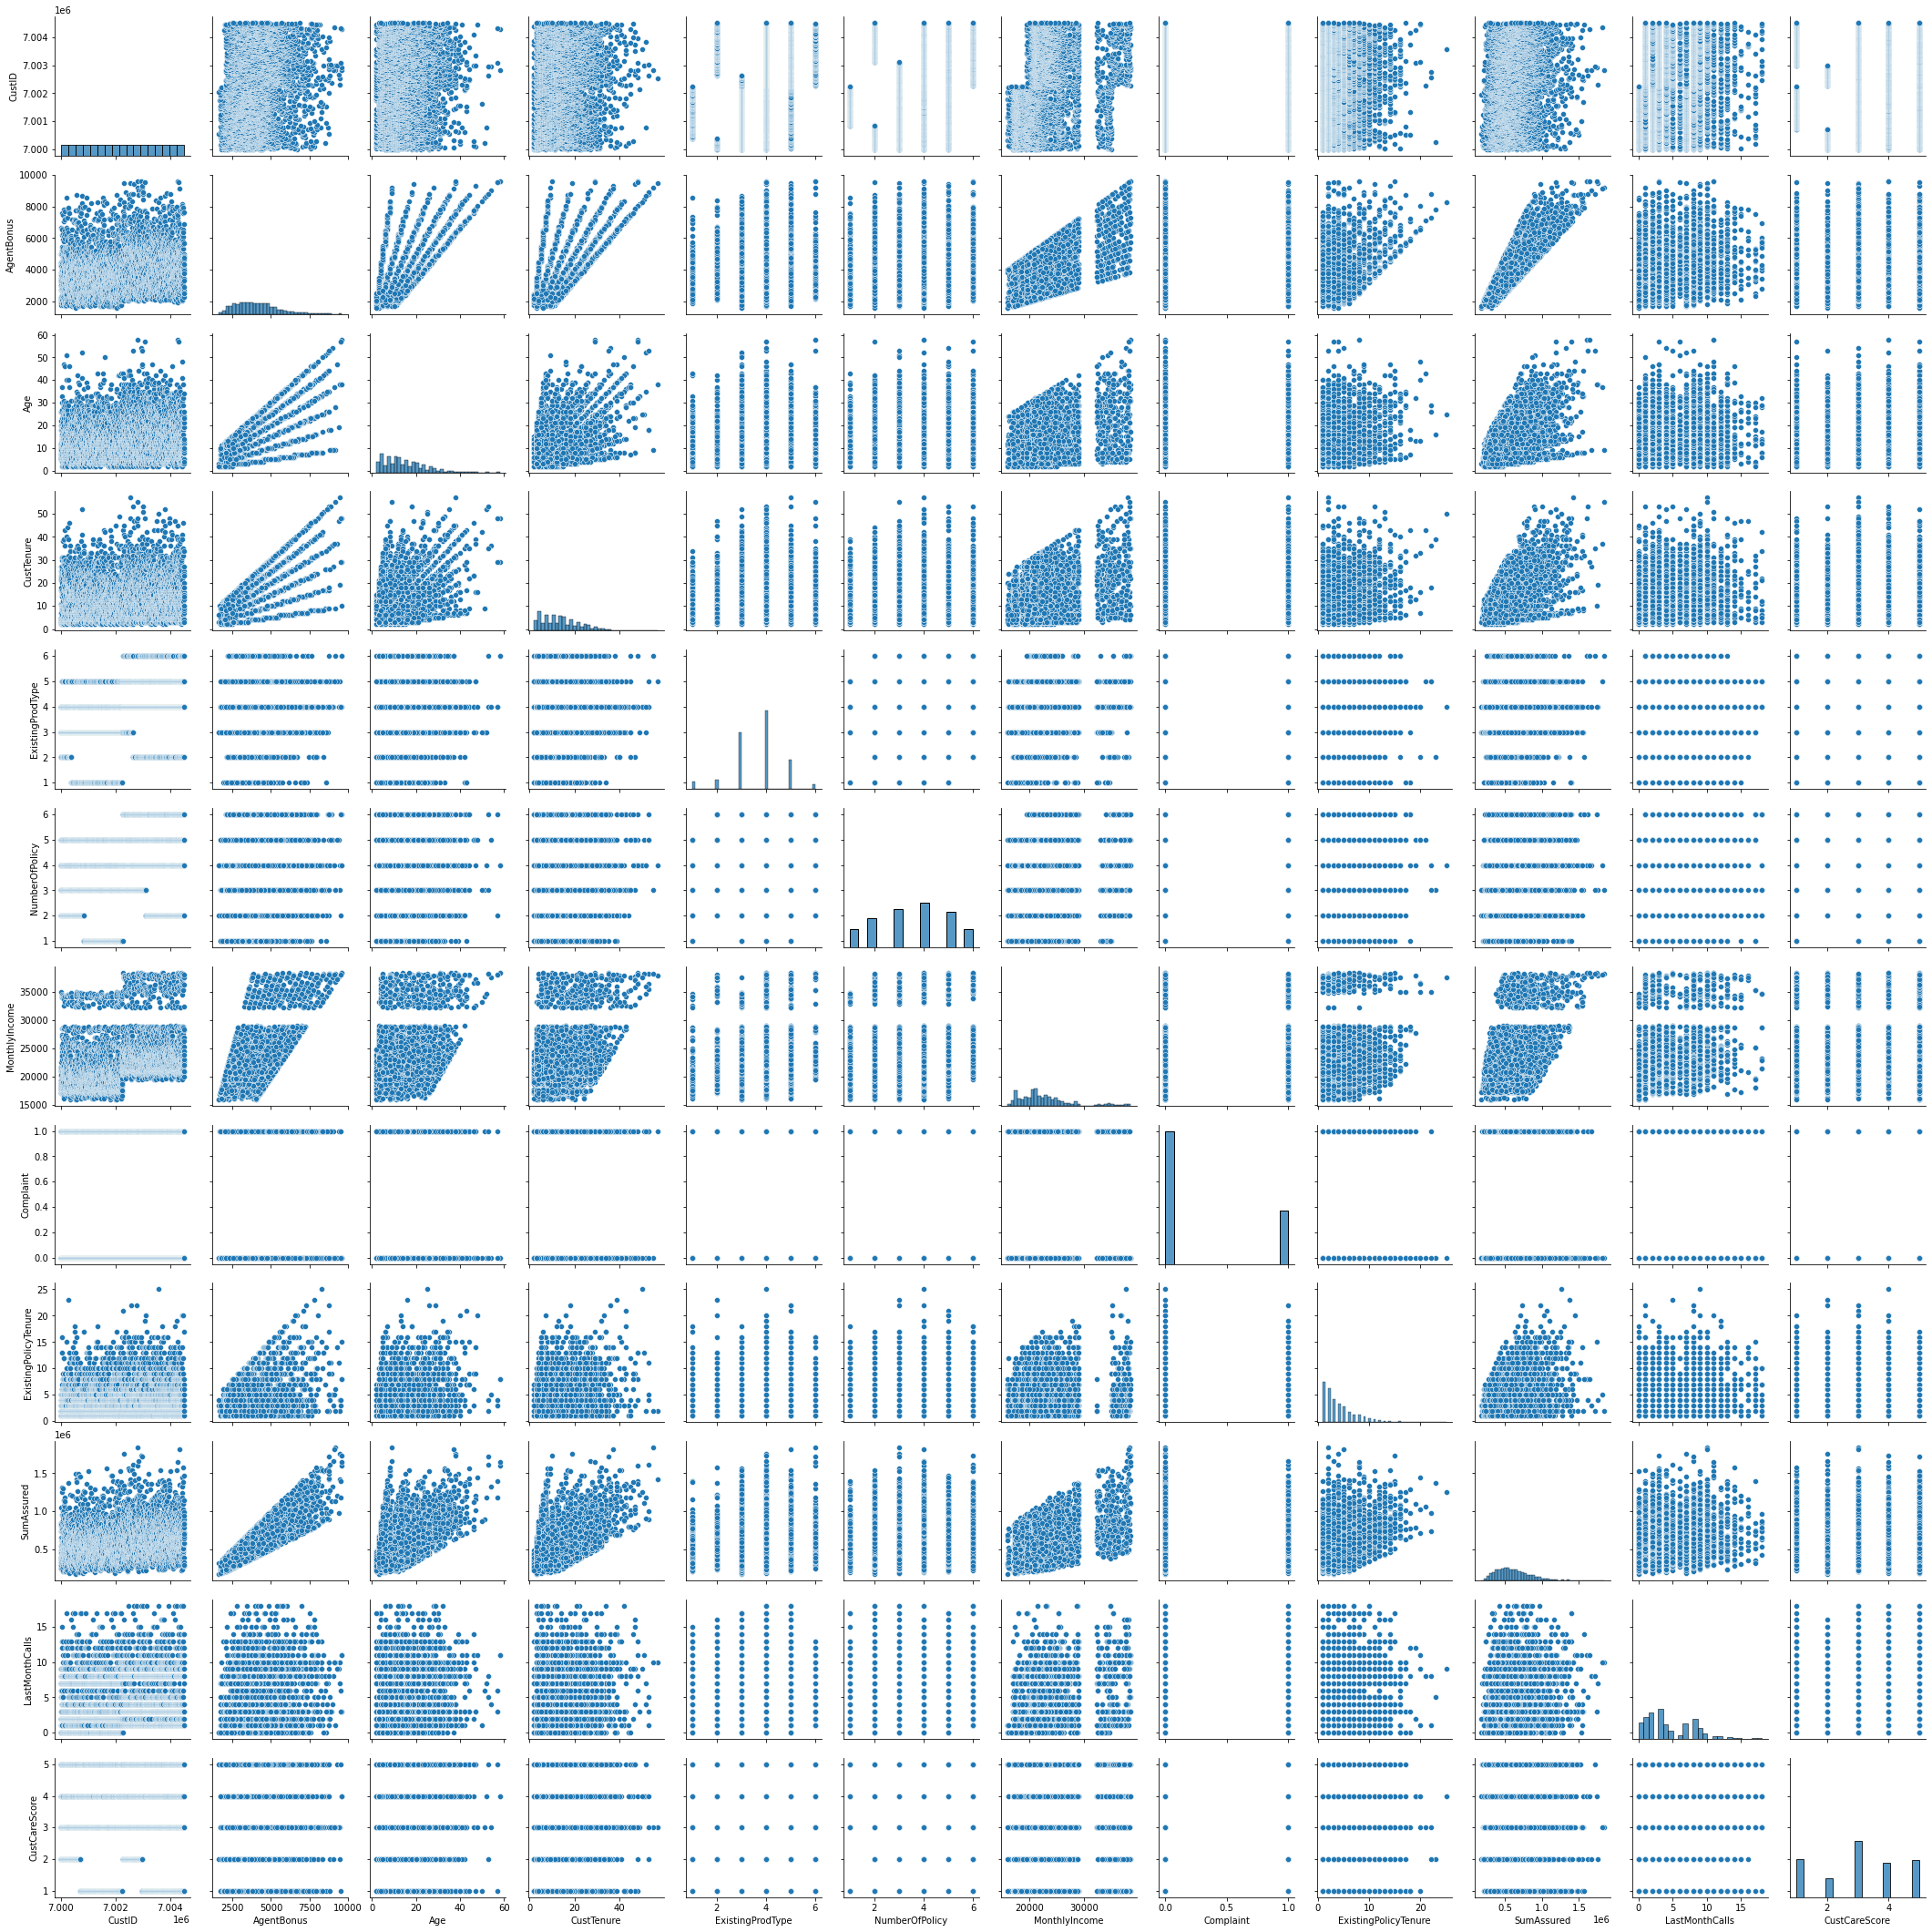

In [35]:
sns.pairplot(data)

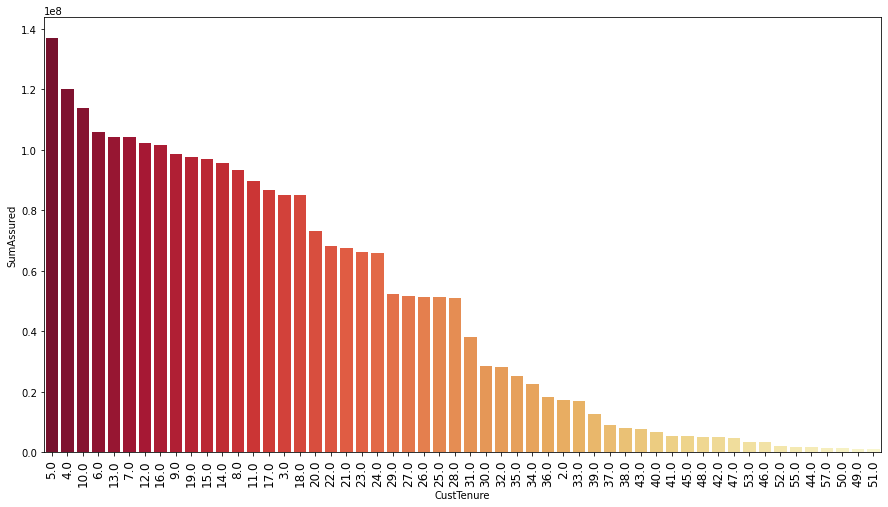

In [105]:
fig=plt.figure(figsize=(15,8))
plt.xticks(rotation=90,fontsize=12)
sns.barplot(y='SumAssured', x='CustTenure', data=data.groupby(['CustTenure']).SumAssured.sum().sort_values(ascending=False).reset_index(),palette='YlOrRd_r',order=list(data.groupby(['CustTenure']).SumAssured.sum().sort_values(ascending=False).reset_index()['CustTenure']));

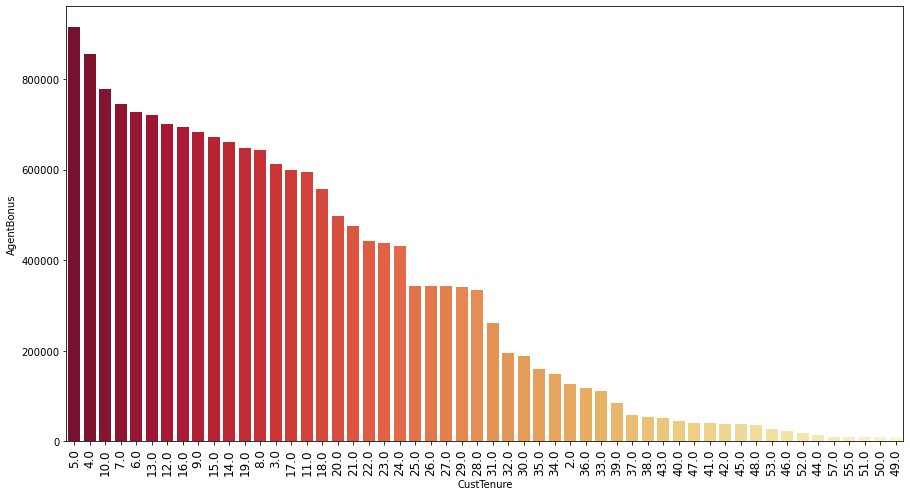

In [56]:
fig=plt.figure(figsize=(15,8))
plt.xticks(rotation=90,fontsize=12)
sns.barplot(y='AgentBonus', x='CustTenure', data=data.groupby(['CustTenure']).AgentBonus.sum().sort_values(ascending=False).reset_index(),palette='YlOrRd_r',order=list(data.groupby(['CustTenure']).AgentBonus.sum().sort_values(ascending=False).reset_index()['CustTenure']));

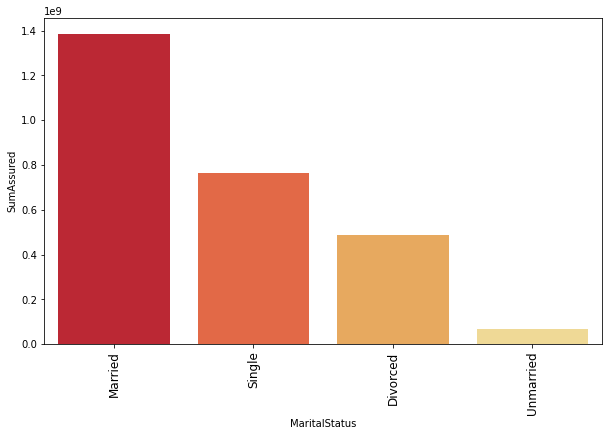

In [69]:
fig=plt.figure(figsize=(10,6))
plt.xticks(rotation=90,fontsize=12)
sns.barplot(y='SumAssured', x='MaritalStatus', data=data.groupby(['MaritalStatus']).SumAssured.sum().sort_values(ascending=False).reset_index(),palette='YlOrRd_r',order=list(data.groupby(['MaritalStatus']).SumAssured.sum().sort_values(ascending=False).reset_index()['MaritalStatus']));

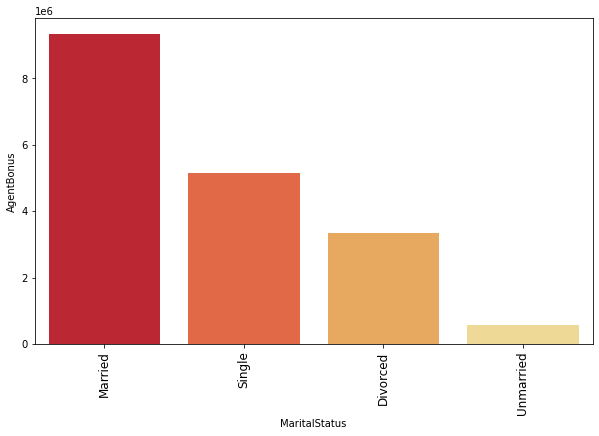

In [70]:
fig=plt.figure(figsize=(10,6))
plt.xticks(rotation=90,fontsize=12)
sns.barplot(y='AgentBonus', x='MaritalStatus', data=data.groupby(['MaritalStatus']).AgentBonus.sum().sort_values(ascending=False).reset_index(),palette='YlOrRd_r',order=list(data.groupby(['MaritalStatus']).AgentBonus.sum().sort_values(ascending=False).reset_index()['MaritalStatus']));

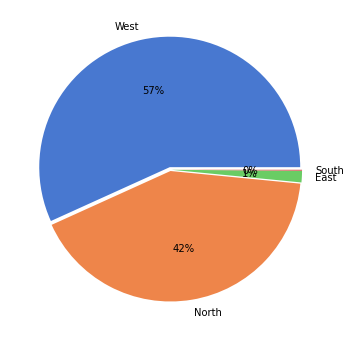

In [92]:
fig=plt.figure(figsize=(10,6))
explode = [0.02,0.01,0.01,0.01]
labels = ['West', 'North', 'East', 'South']
colors = sns.color_palette('muted')
plt.pie(data['Zone'].value_counts(), labels=labels,colors = colors, autopct = '%0.0f%%',explode = explode)
plt.show()

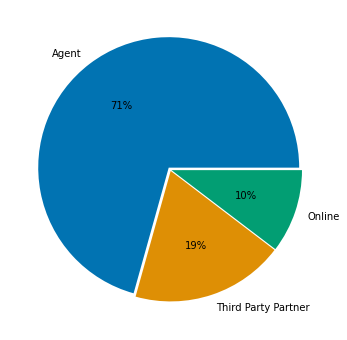

In [91]:
fig=plt.figure(figsize=(10,6))
explode = [0.02,0.01,0.01]
labels = ['Agent', 'Third Party Partner', 'Online']
colors = sns.color_palette('colorblind')
plt.pie(data['Channel'].value_counts(), labels=labels,colors = colors, autopct = '%0.0f%%',explode = explode)
plt.show()

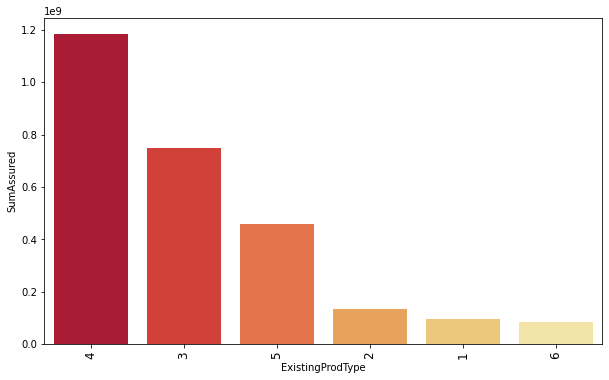

In [106]:
fig=plt.figure(figsize=(10,6))
plt.xticks(rotation=90,fontsize=12)
sns.barplot(y='SumAssured', x='ExistingProdType', data=data.groupby(['ExistingProdType']).SumAssured.sum().sort_values(ascending=False).reset_index(),palette='YlOrRd_r',order=list(data.groupby(['ExistingProdType']).SumAssured.sum().sort_values(ascending=False).reset_index()['ExistingProdType']));

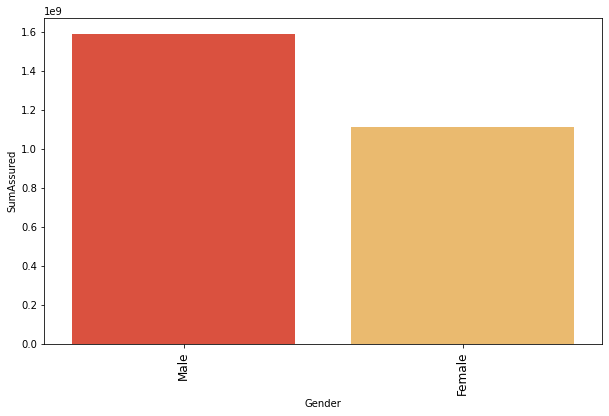

In [107]:
fig=plt.figure(figsize=(10,6))
plt.xticks(rotation=90,fontsize=12)
sns.barplot(y='SumAssured', x='Gender', data=data.groupby(['Gender']).SumAssured.sum().sort_values(ascending=False).reset_index(),palette='YlOrRd_r',order=list(data.groupby(['Gender']).SumAssured.sum().sort_values(ascending=False).reset_index()['Gender']));

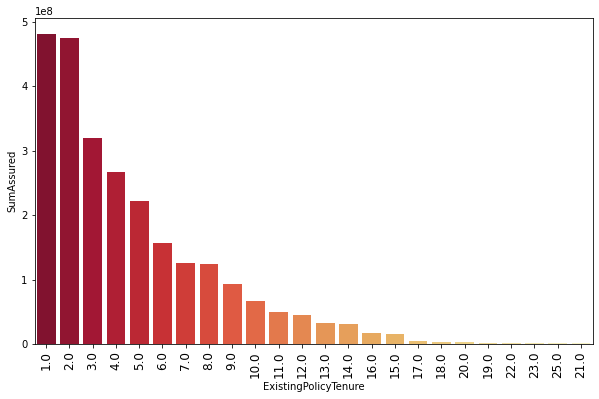

In [108]:
fig=plt.figure(figsize=(10,6))
plt.xticks(rotation=90,fontsize=12)
sns.barplot(y='SumAssured', x='ExistingPolicyTenure', data=data.groupby(['ExistingPolicyTenure']).SumAssured.sum().sort_values(ascending=False).reset_index(),palette='YlOrRd_r',order=list(data.groupby(['ExistingPolicyTenure']).SumAssured.sum().sort_values(ascending=False).reset_index()['ExistingPolicyTenure']));

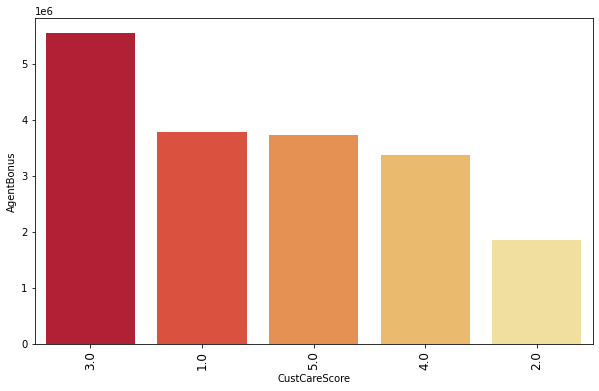

In [110]:
fig=plt.figure(figsize=(10,6))
plt.xticks(rotation=90,fontsize=12)
sns.barplot(y='AgentBonus', x='CustCareScore', data=data.groupby(['CustCareScore']).AgentBonus.sum().sort_values(ascending=False).reset_index(),palette='YlOrRd_r',order=list(data.groupby(['CustCareScore']).AgentBonus.sum().sort_values(ascending=False).reset_index()['CustCareScore']));

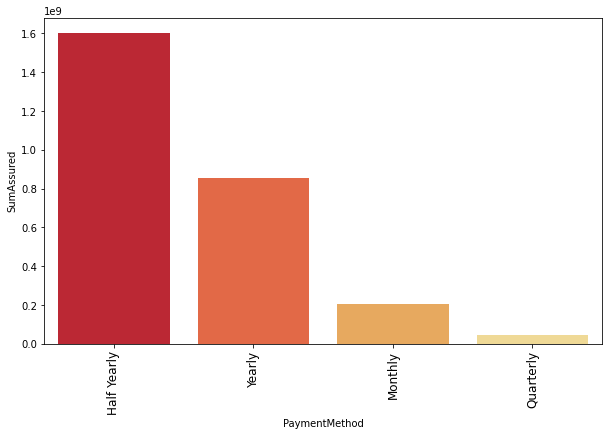

In [112]:
fig=plt.figure(figsize=(10,6))
plt.xticks(rotation=90,fontsize=12)
sns.barplot(y='SumAssured', x='PaymentMethod', data=data.groupby(['PaymentMethod']).SumAssured.sum().sort_values(ascending=False).reset_index(),palette='YlOrRd_r',order=list(data.groupby(['PaymentMethod']).SumAssured.sum().sort_values(ascending=False).reset_index()['PaymentMethod']));

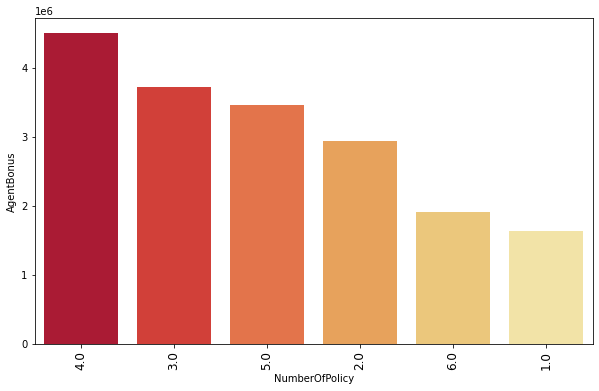

In [113]:
fig=plt.figure(figsize=(10,6))
plt.xticks(rotation=90,fontsize=12)
sns.barplot(y='AgentBonus', x='NumberOfPolicy', data=data.groupby(['NumberOfPolicy']).AgentBonus.sum().sort_values(ascending=False).reset_index(),palette='YlOrRd_r',order=list(data.groupby(['NumberOfPolicy']).AgentBonus.sum().sort_values(ascending=False).reset_index()['NumberOfPolicy']));